## Supuestos estructurales del Modelo Clásico de Regresión Lineal (MCRL)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [3]:
data=pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Programación\Python\Curso Econometría básica con Python\Bases de Datos\GujaratiPorter71.txt", delimiter = "\t")

In [4]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


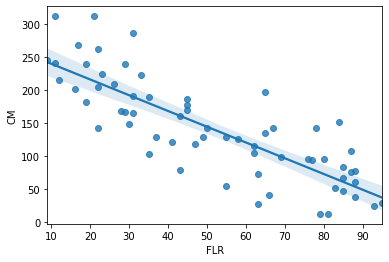

In [5]:
sns.regplot(x = data["FLR"], y = data["CM"]);

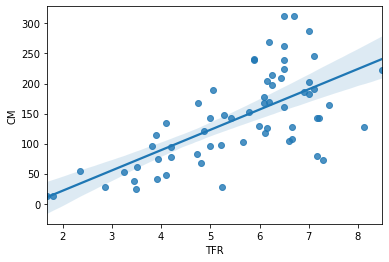

In [6]:
sns.regplot(x = data["TFR"], y = data["CM"]);

**Supuesto #6: Observaciones mayores a parámetros**

In [7]:
data.shape # Filas y columnas 

(64, 4)

In [9]:
data["CM"][0:3]

0    128
1    204
2    202
Name: CM, dtype: int64

In [27]:
modelo_prueba=sm.OLS(data["CM"],sm.add_constant(data[["PGNP","TFR","FLR"]]))
resultado_prueba=modelo_prueba.fit()
print(resultado_prueba.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     59.17
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           6.46e-18
Time:                        17:30:45   Log-Likelihood:                -323.43
No. Observations:                  64   AIC:                             654.9
Df Residuals:                      60   BIC:                             663.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.3067     32.892      5.117      0.0

**Supuesto #7: Variabilidad en las variables**

In [19]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


In [21]:
sm.add_constant(data).apply(np.std, axis = 0) 

const       0.000000
CM         75.382151
FLR        25.803873
PGNP     2704.317439
TFR         1.497158
dtype: float64

In [24]:
tabla = pd.DataFrame(data.apply(np.std, axis = 0) ,columns=["Desviación Estandar"])

**Supuesto #8: Multicolinealidad**

In [23]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


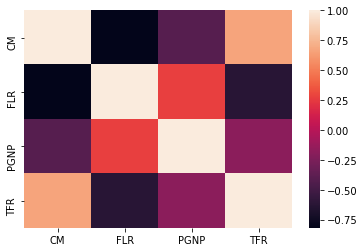

In [30]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones)
plt.show()

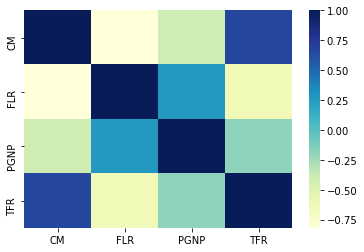

In [31]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "YlGnBu")
plt.show()

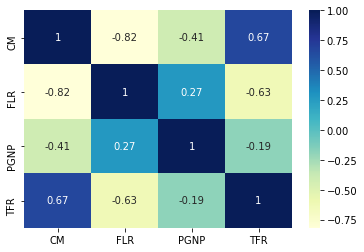

In [32]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "YlGnBu", annot = True)
plt.show()

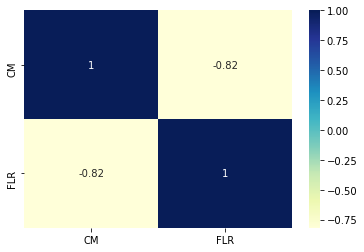

In [33]:
correlaciones=data[["CM","FLR"]].corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "YlGnBu", annot = True)
plt.show()

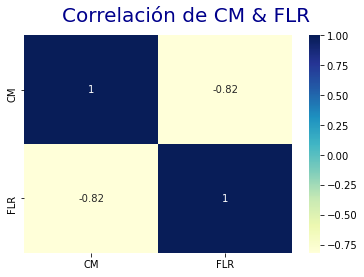

In [35]:
correlaciones=data[["CM","FLR"]].corr()
fig,ax=plt.subplots()
fig.suptitle("Correlación de CM & FLR", fontsize = 20, color = "darkblue")
sns.heatmap(correlaciones, cmap = "YlGnBu", annot = True)
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Nombre"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
vif_data

,Nombre,VIF
0,CM,12.465787
1,FLR,3.937469
2,PGNP,1.494594
3,TFR,20.210255


**Supuesto de no sesgo de especificación**

In [44]:
modelo1=sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR"]]))
resultados1=modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           5.12e-17
Time:                        17:51:07   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [45]:
valores_estimados=resultados1.predict()
residuos = resultados1.resid

In [47]:
# Prueba CUSUM para medir cambio estructural 
# (para probar si los coeficientes en un modelo son constantes)

# H0 = NO HAY CAMBIO ESTRUCTURAL
# H1 = HA CAMBIO ESTRUCTURAL

resultados_CUSUM = sms.breaks_cusumolsresid(residuos)
print(resultados_CUSUM)

(0.5191974341185455, 0.9503227705917949, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [50]:
# Para evaluar si la forma funcional es la correcta se utiliza el test de RESET de Ramsey

# H0 = FORMA FUNCIONAL CORRECTA
# H1 = FORMA FUNCIONAL ES INCORRECTA 

resultados_RESET = sms.linear_reset(resultados1)
estadistico = resultados_RESET.statistic
p_valor = resultados_RESET.pvalue

nombres = ["Estadístico","p-valor"]
pd.DataFrame([float(estadistico),float(p_valor)], index = nombres, columns = ["RESET"])

C:\Users\57317\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


,RESET
Estadístico,3.157124
p-valor,0.206272


## Ejercicio

Realice un modelo de regresión lineal con la base de datos Ingreso_Ahorro; adicionalmente, verifique el cumplimiento de los supuesto vistos en clase.

Este archivo de datos contiene información sobre 26 automóviles, a saber, su marca, precio, millas por galón, calificación de reparación (en 1978), peso en libras, longitud en pulgadas y si el automóvil era extranjero o nacional. Aquí está el archivo de datos.

In [3]:
datos_ejercicio=pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Programación\Python\Curso Econometría básica con Python\Bases de datos\regression_auto.csv")

In [4]:
datos_ejercicio.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


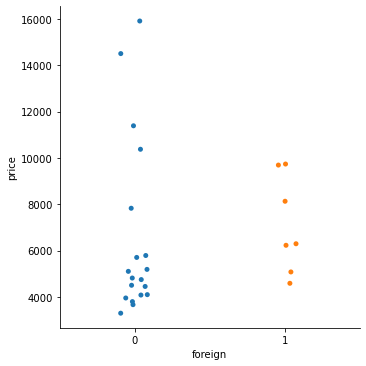

In [6]:
sns.catplot(x="foreign", y="price", data=datos_ejercicio);

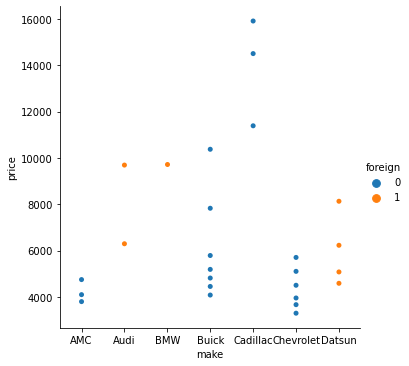

In [8]:
sns.catplot(x="make", y="price", hue="foreign", kind="swarm", data=datos_ejercicio);

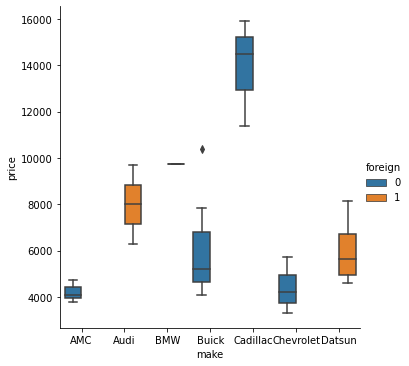

In [9]:
sns.catplot(x="make", y="price", hue="foreign", kind="box", data=datos_ejercicio);

### Modificación de bases de datos

In [10]:
datos_ejercicio.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


In [15]:
datos_modificados = datos_ejercicio.loc[(datos_ejercicio["foreign"] == 1) |
                                        (datos_ejercicio["price"] >7000)]
datos_modificados

,make,mpg,weight,weight1,price,foreign,repairs,length
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174
5,BMW,25,2650,2.65,9735,1,4,177
7,Buick,15,4080,4.08,7827,0,4,222
11,Buick,16,3880,3.88,10372,0,3,207
13,Cadillac,14,4330,4.33,11385,0,3,221
14,Cadillac,14,3900,3.90,14500,0,2,204
15,Cadillac,21,4290,4.29,15906,0,3,204
22,Datsun,23,2370,2.37,6229,1,4,170
23,Datsun,35,2020,2.02,4589,1,5,165


In [ ]:
condicion1 and condicion2
condicion1 & condicion2

condicion1 or condicion2
condicion1 | condicion2